In [1]:
import pandas as pd 
import sidetable as stb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

    La covarianza indica la dirección de la relación entre dos variables y la correlación nos indica también la intensidad de esa relación


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [2]:
df = pd.read_csv('data/supermarket_1.csv', index_col = 0)
df.sample(10)

,invoice_id,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
72,510-95-6347,Mandalay,Member,Female,Food and beverages,48.52,3,7.2780,152.8380,3/5/2019,18:17,Ewallet,145.56,7.2780,4.0
239,478-06-7835,Yangon,Normal,Male,Fashion accessories,89.69,1,4.4845,94.1745,1/11/2019,11:20,Ewallet,89.69,4.4845,4.9
12,365-64-0515,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,11.7375,7.1
279,828-61-5674,Yangon,Member,Male,Sports and travel,44.02,10,22.0100,462.2100,3/20/2019,19:57,Credit card,440.20,22.0100,9.6
651,563-47-4072,Mandalay,Normal,Female,Health and beauty,55.81,6,16.7430,351.6030,1/22/2019,11:52,Cash,334.86,16.7430,9.9
814,778-34-2523,Yangon,Member,Female,Electronic accessories,48.62,8,19.4480,408.4080,1/24/2019,10:57,Cash,388.96,19.4480,5.0
320,649-11-3678,Naypyitaw,Normal,Female,Food and beverages,22.93,9,10.3185,216.6885,2/26/2019,20:26,Cash,206.37,10.3185,5.5
338,633-09-3463,Naypyitaw,Normal,Female,Electronic accessories,47.65,3,7.1475,150.0975,3/28/2019,12:58,Credit card,142.95,7.1475,9.5
880,490-95-0021,Mandalay,Member,Female,Food and beverages,33.21,10,16.6050,348.7050,1/8/2019,14:25,Ewallet,332.10,16.6050,6.0
19,319-50-3348,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15:30,Ewallet,80.60,4.0300,4.4


In [3]:
df_num = df.select_dtypes(include= ["float64", "int64"])
df_num.sample(2)

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
137,34.42,6,10.326,216.846,206.52,10.326,9.8
19,40.30,2,4.030,84.630,80.60,4.030,4.4


In [4]:
df_num.cov()

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
unit_price,701.965331,0.834778,196.668340,4130.035142,3933.366802,196.668340,-0.399668
quantity,0.834778,8.546446,24.149570,507.140978,482.991408,24.149570,-0.079456
tax_5%,196.668340,24.149570,137.096594,2879.028477,2741.931883,137.096594,-0.733300
total,4130.035142,507.140978,2879.028477,60459.598018,57580.569541,2879.028477,-15.399306
cogs,3933.366802,482.991408,2741.931883,57580.569541,54838.637658,2741.931883,-14.666006
gross_income,196.668340,24.149570,137.096594,2879.028477,2741.931883,137.096594,-0.733300
rating,-0.399668,-0.079456,-0.733300,-15.399306,-14.666006,-0.733300,2.953518


In [5]:
df_num.corr(method = 'pearson')

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
tax_5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


- Interpretación de los resultados obtenidos: la mayoría de nuestras variables tienen una relación muy fuerte porque son dependientes entre sí. El precio determina los impuestos, el margen de beneficio, etc.



3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

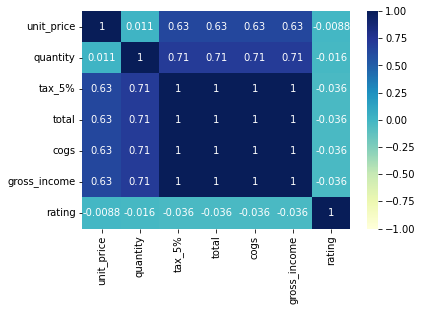

In [6]:
sns.heatmap(df_num.corr(),
            vmax = 1,
            vmin = -1,
            cmap = "YlGnBu",
           annot = True); 

4. Guardad la gráfica del heatmap.


Procedemos a eliminar las columnas altamente dependientes para continuar analizando nuestros datos de una maneras más real.

In [7]:
df.head()

,invoice_id,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [8]:
#Eliminamos 'tax_5%', 'cogs', 'gross_income' por su alta correlación (1) con la columna total.
df = df.drop(['tax_5%', 'cogs', 'gross_income'], axis = 1)

In [10]:
df.to_csv('data/supermarket_2.csv')